In [46]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
lab=LabelEncoder()
df=lab.fit_transform(data['region'])
pd.Series(df)
data['region']=df
df

array([3, 2, 2, ..., 2, 3, 1])

In [51]:
lab=LabelEncoder()
df=lab.fit_transform(data['sex'])
pd.Series(df)
data['sex']=df
df

array([0, 1, 1, ..., 0, 0, 0])

In [52]:
lab=LabelEncoder()
df=lab.fit_transform(data['smoker'])
pd.Series(df)
data['smoker']=df
df

array([1, 0, 0, ..., 0, 0, 1])

In [53]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [54]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


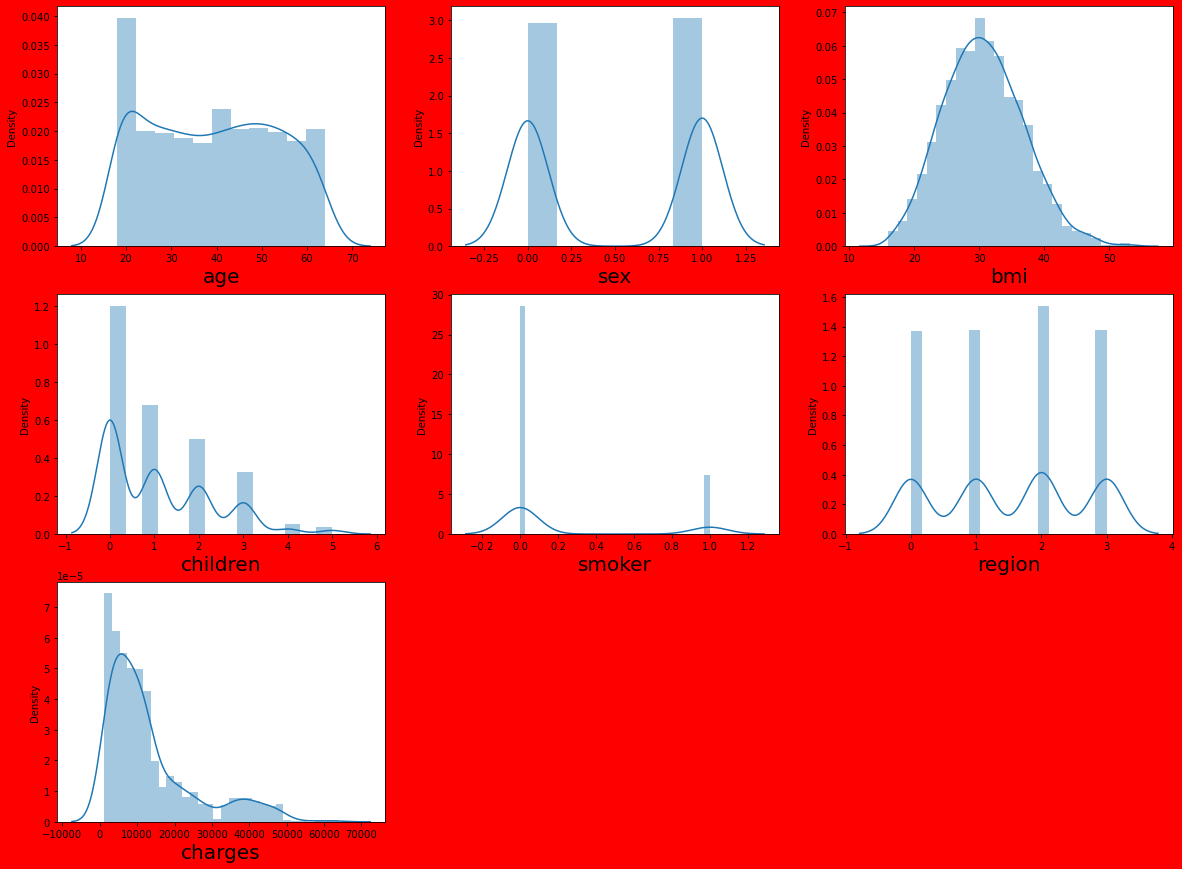

In [55]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1    
plt.show() 

In [56]:
data.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

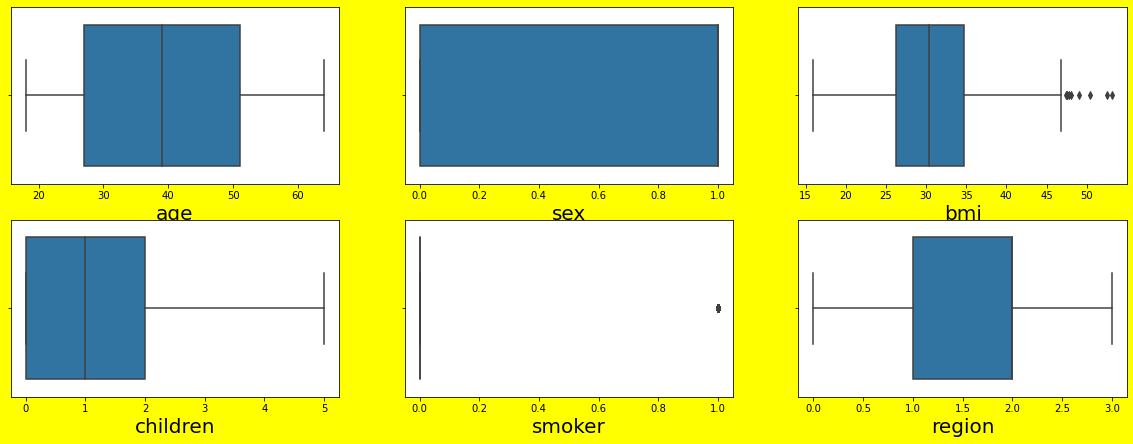

In [57]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1    
plt.show()   

In [58]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [59]:
x=data.drop(columns=['charges'])
y=data['charges']

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(data))
print(np.where(z>3))
new=data[(z<3).all(axis=1)]
new

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [65]:
from sklearn.preprocessing import power_transform

In [66]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

In [67]:
df_new.skew()

age        -0.100193
sex        -0.020951
bmi        -0.006617
children    0.105254
smoker      1.464766
region     -0.172450
dtype: float64

In [68]:
x=df_new

In [69]:
x=new.drop(columns=['charges'])
y=new['charges']

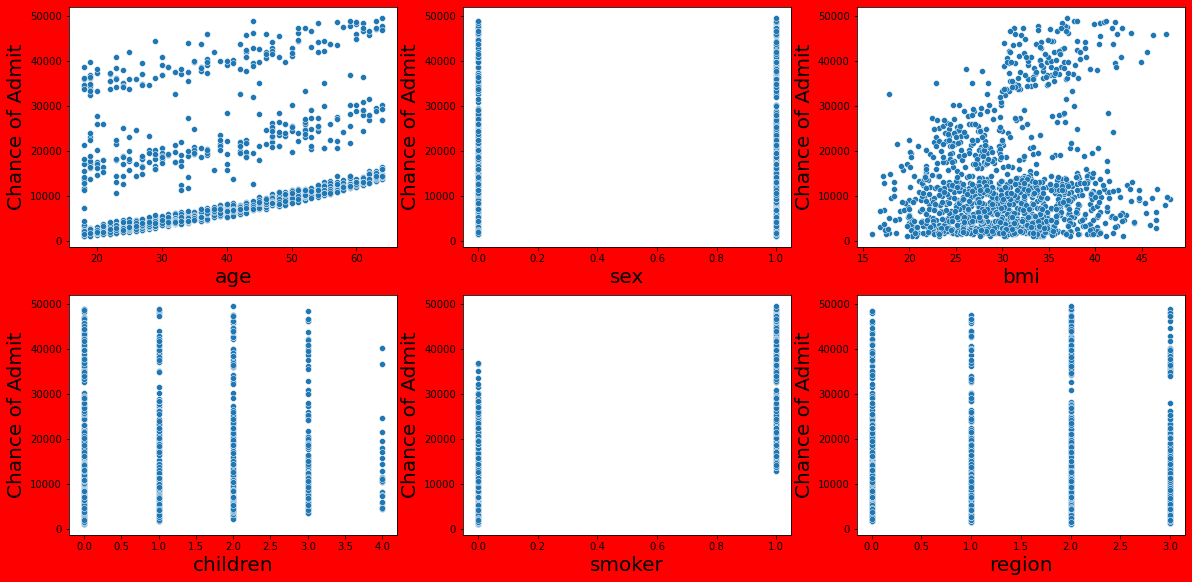

In [70]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1    
plt.show() 

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=348)

In [72]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [73]:
regression.score(x_train,y_train)

0.7629858757069027

In [74]:
regression.score(x_test,y_test)

0.7182846043158404

In [75]:
y_predict=regression.predict(x_test)

Text(0.5, 1.0, 'Actual vs model predict')

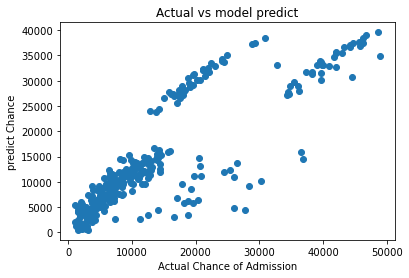

In [76]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('predict Chance')
plt.title('Actual vs model predict')

In [77]:
print('Predicting insurance cost: ',regression.predict(([[19,0,27.900,0,1,3]])))

Predicting insurance cost:  [25451.44936624]


In [78]:
print('Predicting insurance cost: ',regression.predict([[61,0,29.070,0,1,1]]))

Predicting insurance cost:  [37201.26865587]
